In [3]:
# cloning GitHub Repo
!git clone https://github.com/chase-kusterer/BASD.git

# changing directory
import os
repo_name = '/content/BASD/'
os.chdir(repo_name)

# checking results
print(f"Current working directory changed to: {os.getcwd()}")

Cloning into 'BASD'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 53 (delta 15), reused 38 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 5.20 MiB | 9.41 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Current working directory changed to: /content/BASD


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>Exploratory Data Analysis</h1>
DAT-7470 - Business Analysis with Structured Data<br>
Guided Analysis Notebook<br><br>

Written by Chase Kusterer - Faculty of Analytics <br>
Hult International Business School <br>
<a href="https://chase-kusterer.github.io/">https://chase-kusterer.github.io/</a> <br><br><br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>
Throughout this session, we will explore the diamonds dataset with a focus on understanding how each feature affects the price of a diamond engagement ring. Before moving forward, however, it is important to acknowledge that correlation does not imply causation. If this concept is new to you, please take a moment to read <a href="https://hbr.org/2015/06/beware-spurious-correlations">this article</a> from Harvard Business Review.
<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

~~~
Some people feel the rain. Others just get wet.
    - Bob Marley
~~~

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>
<h2>Part I: Exploring Individual Features</h2>
<h4>a) Complete the code to import the diamonds dataset with proper data types.</h4>

In [4]:
# importing packages
import pandas as pd  # data science essentials
import matplotlib.pyplot as plt # NEW: data visualization essentials
import seaborn as sns # NEW: enhanced data visualization
import statsmodels.formula.api as smf # NEW: linear modeling


# specifying a file name
file = "/content/BASD/datasets/diamonds.xlsx"


# converting data types with a dictionary
data_types = {"channel" : str,
              "store"   : str}


# reading the file into Python through pandas
diamonds = pd.read_excel(io     = file,
                     dtype      = int,
                     usecols    = range(1, 8)) # omitting Obs


# outputting the first 5 rows of the dataset
diamonds.head(n = 5)

,carat,color,clarity,cut,channel,store,price
0,0,3,7,0,0,7,1375
1,0,5,7,1,0,7,1680
2,0,4,7,1,0,7,2245
3,0,5,7,0,0,3,2495
4,0,7,8,0,0,8,2699


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Histograms</h3><br>
Let's assume that one of our goals is to understand how features like carat, color, clarity, and cut contribute to the price of a diamond engagement ring. This will require a predictive model, but before building one, a best practice is to thouroghly explore the underlying data, collecting additional domain knowledge as necessary. We need to pay close attention to price given that this is what our model will be predicting.

In [ ]:
# documentation for making histplot
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.

    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.

    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate, simila

<br>

<strong>b) Complete the code and analyze the distribution of price.</strong><br>
Does it look as if <em>price</em> is normally distributed? Does it appear to be skewed positive or negative?

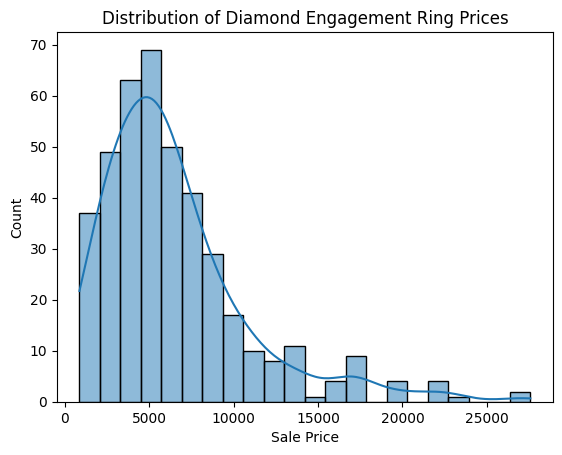

In [6]:
# developing a histogram using HISTPLOT
sns.histplot(data   = diamonds,
         x      = 'price',
         kde    = True)


# title and axis labels
plt.title(label   = "Distribution of Diamond Engagement Ring Prices")
plt.xlabel(xlabel = "Sale Price") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")


# displaying the histogram
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
As can be observed from the histogram above, sale prices are skewed positive. This also something of interest that we will take care of after getting a little further in our analysis. For now, let's move forward and explore other features in the dataset.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Binning Bias</h3><br>
Run the following code to generate a histogram for diamond color.

In [ ]:
# diamond color distribution
sns.histplot(x    = 'color',
             data = diamonds)


# title and labels
plt.title (label  = 'Distribution of Diamond Color')


# displaying the plot
plt.show()

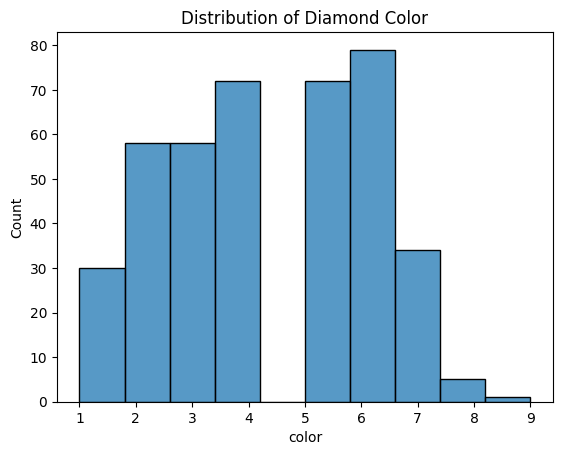

In [9]:
sns.histplot(x = "color", data = diamonds)

plt.title(label = "Distribution of Diamond Color")

plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>c) Adjust the code below to avoid binning bias.</h4>

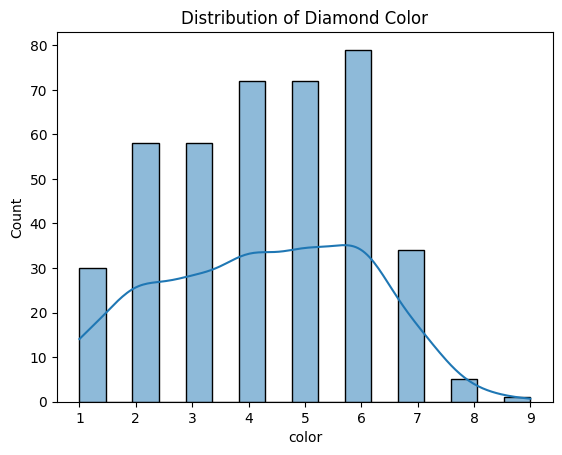

In [25]:
# diamond color distribution
sns.histplot(x    = 'color',
             data = diamonds,
             bins = 17,
             kde = True)


# title and labels
plt.title (label  = 'Distribution of Diamond Color')


# displaying the plot
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>d) Develop histograms for carat, clarity, and cut.</h4>
Are any of the features normally distributed? Did the number of bins need to be adjusted for any of the features?

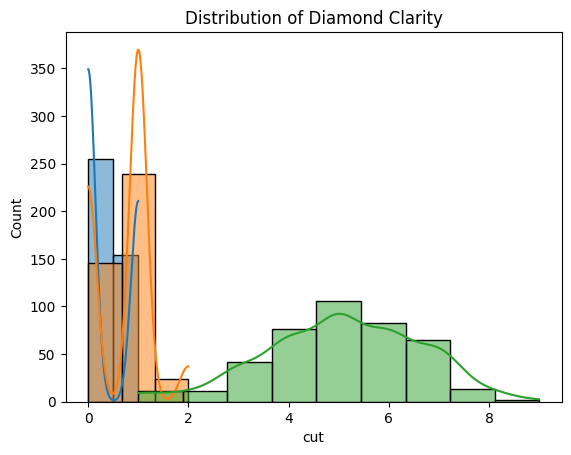

In [34]:
# developing a histogram
sns.histplot(data = diamonds, x = "cut", bins = 2, kde = True)

sns.histplot(data = diamonds, x = "carat", bins = 3, kde = True)

sns.histplot(data = diamonds, x = "clarity", bins = 9, kde = True)


# title and labels
plt.title (label  = 'Distribution of Diamond Clarity')


# displaying the plot
plt.show()

<hr style="height:.9px;border-width:0;color:gray;background-color:gray">
<h3>Boxplots</h3>

Boxplots can be made as easily as other plots in seaborn.

In [ ]:
help(sns.boxplot)

<br>
<h4>e) Build a boxplot in the code cell below any way you like.</h4>

In [ ]:
# have fun!
____.____(____) # DataFrame where features exist


# formatting and displaying the plot
plt.title(label = '____')
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br>
<h2>Part II: Linear Correlation</h2>
<h4>a) Complete the code to generate (Pearson) correlation coefficients for the <em>diamonds</em> dataset. Round your results to two decimal places.</h4>

In [ ]:
# linear (Pearson) correlation
diamonds.____(method = ).round(decimals = 2)

<br>

In [ ]:
# linear (Pearson) correlation
diamonds.corr(method = 'pearson',
              ____ = ____).round(decimals = 2)

<br><hr style="height:.9px;border-width:0;color:gray;background-color:gray"><br>
We can save this as an object as a DataFrame and then turn it into a heatmap.
<br>
<h4>c) Complete the code below to:</h4>
&#8195;&#8195;i) store the correlation table as an object<br>
&#8195;&#8195;ii) instantiate a heatmap from the stored correlation table

In [ ]:
# converting correlation matrix into a DataFrame
diamonds_corr = diamonds.____(method  = 'pearson',
                              numeric_only = ____).round(____)

# instantiating a heatmap
sns.heatmap(data = ____)


# displaying the plot
plt.show(block = True)

<br><hr style="height:.9px;border-width:0;color:gray;background-color:gray"><br>
Let's spice up the heatmap.

<br>

~~~
         -_
         `-;-_   ,--.__
            `-;-/. ,/\-`.
            _//"\\  '/  |
           /'-   \\ `;\-|    <-- chili pepper
         ,'  ;/   \\  \|;
       ./'  ;'     \\  \(
     ,-" _;'        \\  `
  ,-'_;-"            \
   "'
~~~

<br>

In [ ]:
# specifying plot size (making it bigger)
fig, ax = plt.subplots( figsize = (8 , 8) )


# developing a spicy heatmap
sns.heatmap(data       = diamonds_corr, # the correlation matrix
            cmap       = 'inferno'    , # changing to SPICY colors
            square     = True         , # tightening the layout
            annot      = True         , # should there be numbers in the heatmap
            linecolor  = 'black'      , # lines between boxes
            linewidths = 0.5          ) # how thick should the lines be?


# title and displaying the plot
plt.title(label = """
Linear Correlation Heatmap for Diamond Features
""")


# showing the finished product
plt.show(block = True)

<br><hr style="height:.9px;border-width:0;color:gray;background-color:gray"><br>
That was too spicy! Let's cool things down a bit in our next plot.

<br>

~~~
            .-~~\
           /     \ _
           ~x   .-~_)_
             ~x".-~   ~-.
         _   ( /         \   _
         ||   T  o  o     Y  ||       <--- snow person
       ==;l   l   <       !  |;==
          \\   \  .__/   /  //
           \\ ,r"-,___.-'r.//
            }^ \.( )   _.'//.
           /    }~Xi--~  //  \
          Y    Y I\ \    "    Y
          |    | |o\ \        |
          |    l_l  Y T       |  
          l      "o l_j       !
           \                 /
    ___,.---^.     o       .^---.._____
"~~~          "           ~            ~~~"

~~~

<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>c) Complete the code to generate a heatmap with the <em>Blues</em> color scheme.</h4>

In [ ]:
# specifying plot size (making it bigger)
fig, ax = plt.subplots( figsize = (8 , 8) )


# developing a freezing cold heatmap
sns.heatmap(data       = diamonds_corr, # the correlation matrix
            cmap       = _____        , # changing to COOL colors
            square     = True         , # tightening the layout
            annot      = True         , # should there be numbers in the heatmap
            linecolor  = 'black'      , # lines between boxes
            linewidths = 0.5          ) # how thick should the lines be?


# title and displaying the plot
plt.title(label = """
Linear Correlation Heatmap for Diamond Features
""")


# rendering the visualization
plt.show(block = True)

<br><hr style="height:.9px;border-width:0;color:gray;background-color:gray"><br>
The heatmap looks freezing now! Let's change the color scheme to a mix between hot and cold.
<br><br>

~~~
                                 .''.
       .''.             *''*    :_\/_:     .
      :_\/_:   .    .:.*_\/_*   : /\ :  .'.:.'.
  .''.: /\ : _\(/_  ':'* /\ *  : '..'.  -=:o:=-
 :_\/_:'.:::. /)\*''*  .|.* '.\'/.'_\(/_'.':'.'
 : /\ : :::::  '*_\/_* | |  -= o =- /)\    '  *
  '..'  ':::'   * /\ * |'|  .'/.\'.  '._____
      *        __*..* |  |     :      |.   |' .---"|
       _*   .-'   '-. |  |     .--'|  ||   | _|    |
    .-'|  _.|  |    ||   '-__  |   |  |    ||      |
    |' | |.    |    ||       | |   |  |    ||      |
 ___|  '-'     '    ""       '-'   '-.'    '`      |____


~~~


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>d) Complete the code to generate a heatmap with the <em>coolwarm</em> color scheme.</h4>

In [ ]:
# specifying plot size (making it bigger)
fig, ax = plt.subplots( figsize = (8 , 8) )


# developing a coolwarm heatmap
sns.heatmap(data       = diamonds_corr, # the correlation matrix
            cmap       = _____        , # changing to MEDIUM colors
            square     = True         , # tightening the layout
            annot      = True         , # should there be numbers in the heatmap
            linecolor  = 'black'      , # lines between boxes
            linewidths = 0.5          ) # how thick should the lines be?


# title and displaying the plot
plt.title(label = """
Linear Correlation Heatmap for Diamond Features
""")


# visualizing the data
plt.show(block = True)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Part III: Scatter and Linear Model Plots</h2><br>
Scatter plots are an excellent tool to analyze the relationship between two variables. Linear model plots are an enhanced version of a scatter plot that includes a trend line based on the <strong>square of the correlation coefficient</strong> between the variables being plotted. The square of the correlation coefficient is more formally known as <strong>R-Squared</strong>.
<br><br>
The code below has been developed to display a scatter plot between <em>carat</em> and <em>price</em>.

In [ ]:
# instantiating a scatter plot for carat and price
sns.lmplot(x          = 'carat' , # x-axis feature
           y          = 'price' , # y-axis feature
           hue        = None    , # categorical data for subsets
           scatter    = True    , # renders a scatter plot
           fit_reg    = False   , # renders a regression line
           aspect     = 2       , # aspect ratio for plot
           data       = diamonds) # DataFrame where features exist


# formatting and displaying the plot
plt.title       (label  = 'Carat Weight and Price')
plt.xlabel      (xlabel = 'Carat Weight'          )
plt.ylabel      (ylabel = 'Price (USD)'           )
plt.xlim        (left   = 0, right = 2.8          )
plt.tight_layout(pad    = 1.0                     )
plt.show        (block  = True                    )

<hr style="height:.9px;border-width:0;color:gray;background-color:gray"><br>
<h4>a) Change the value of the <em>fit_reg</em> argument to True.</h4>

In [ ]:
# instantiating an lmplot for carat and price
sns.lmplot(x       = 'carat' , # x-axis feature
           y       = 'price' , # y-axis feature
           hue     = None    , # categorical data for subsets
           scatter = True    , # renders a scatter plot
           fit_reg = ____    , # renders a regression line
           aspect  = 2       , # aspect ratio for plot
           data    = diamonds) # DataFrame where features exist


# formatting and displaying the visualization
plt.title       (label  = 'Carat Weight and Price')
plt.xlabel      (xlabel = 'Carat Weight'          )
plt.ylabel      (ylabel = 'Price (USD)'           )
plt.xlim        (left   = 0, right = 2.8          )
plt.tight_layout(pad    = 10.0                    )
plt.show        (block  = True                    )

<hr style="height:.9px;border-width:0;color:gray;background-color:gray"><br>

According to <a href="miller_mds_two_months_salary_case.pdf">the documentation on the dataset</a>, "diamonds are sized in one-quarter increments". However, it does not appear that the trend between price and carat weight changes with each 0.25 increment. What the documentation likely meant was that when a diamond is sold to a customer, it is replaced with a new one that has a relatively similar carat weight. It does look, however, that the trend becomes more steep as carat weight increases beyond 1.50. Also, there appears to be a downward-sloping trend after carat weight surpasses 2.00 (although we do not have many observations with carat weights above this threshold).
<br><br>
Let's develop vertical axis lines at half carat increments and store this as a categorical variable. This has been done in the code cell below, as well as revisualizing the scatter plot.

In [ ]:
# creating a dummy column in the diamonds DataFrame
diamonds['Carat Size'] = ''


# for loop with iterrows() <-- one of the most useful methods for DataFrames
for index, col in diamonds.iterrows():


    # conditionals to change the values in the new column
    if diamonds.loc[index, 'carat'] < 0.5:
        diamonds.loc[index, 'Carat Size'] = '[0.0, 0.5)'


    elif diamonds.loc[index, 'carat'] < 1.0:
        diamonds.loc[index, 'Carat Size'] = '[0.5 - 1.0)'


    elif diamonds.loc[index, 'carat'] < 1.5:
        diamonds.loc[index, 'Carat Size'] = '[1.0 - 1.5)'


    elif diamonds.loc[index, 'carat'] < 2.0:
        diamonds.loc[index, 'Carat Size'] = '[1.5 - 2.0)'


    elif diamonds.loc[index, 'carat'] >= 2.0: # this is where the bug was
        diamonds.loc[index, 'Carat Size'] = '[2.0 - inf)'


    # safety net
    else:
        diamonds.loc[index, 'Carat Size'] = 'error'


# instantiating an lmplot for carat and price
sns.lmplot(x          = 'carat'     ,
           y          = 'price'     ,
           hue        = 'Carat Size', # categorical data for subsets
           legend     = False       , # supressing the legend
           scatter    = True        ,
           fit_reg    = True        ,
           aspect     = 2           ,
           data       = diamonds    )


# developing vertical axis lines
value = 0.50

while value < 3.00:

    # making a vertical line
    plt.axvline(x = value, color = "purple", linestyle = '--')

    # incrementing value in one-quarter increments
    value += 0.50


# formatting and displaying the plot
plt.title       (label  = 'Carat Weight and Price')
plt.xlabel      (xlabel = 'Carat Weight'          )
plt.ylabel      (ylabel = 'Price (USD)'           )
plt.xlim        (left   = 0, right = 2.8          )
plt.tight_layout(pad    = 1.0                     )
plt.show        (block  = True                    )

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Part IV: Base Modeling</h2>

It's time to develop a base model! A <strong>base model</strong> is a simple, interpretable model that is built using available features in their original form. Base models are very important as they:

* Allow us to confirm our original (base) data, assumptions, and domain knowledge. Think of this as a common sense test. If the findings from our base model don't make sense, we likely need new data, different assumptions about the relationships between our features, or better domain knowledge before moving forward.
* Provide a benchmark to compare to more complex models. Additionally, as models get more complex, they tend to get less interpretable and harder to take action from.
* Are built with features that follow the assumptions of the type of model we are using.

Base modeling is a form of <strong>predictive modeling</strong>. A straightforward definition of predictive modeling can be found in <a href="https://towardsdatascience.com/selecting-the-correct-predictive-modeling-technique-ba459c370d59">this article from Towards Data Science</a>:
<br><br>

<div align="center">
    Predictive modeling is the process of taking known results and developing<br>a model that can predict values for new occurrences.
    
<a class="tocSkip"></a></div><br>
In other words, predictive modeling is the process of using historic data to estimate the values of unknown observations. The keyword in this definition is estimate. Predictive modeling is all about developing our "best guess" given all available information. <font style=color:red><strong>Predictive modeling is NOT about being right. It is about being less wrong.</strong></font>
<a class="tocSkip"></a></div>
<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h4>a) Complete the code below and analyze the correlations with <em>price</em>.</h4>
Which feature has the strongest correlation with price?

In [ ]:
# developing a correlation matrix
diamonds_corr = diamonds.____(method  = 'pearson',
                              numeric_only = True)


# filtering results to show correlations with Sale_Price
diamonds_corr.loc[ : , ____].round(decimals = 2).sort_values(ascending = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h3>Building A Base Model</h3><br>
The following code has been provided for you. Its purpose is to provide a basic framework for developing a predictive model in Python using the <a href="https://www.statsmodels.org/stable/index.html">statsmodels</a> package. Keep in mind that there are several techniques we can employ to make this model more optimal, which we will cover in our later sessions.

In [ ]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """price ~ carat""",
                  data    = diamonds)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Team Challenge</h2>

<h4>Develop an optimal base model using more than one x-feature.</h4><br>
Your task is to find the combination of X-features that maximizes adjusted R-squared, where all coefficients have p-values of $\leq$ 0.05.
<br><br><br>
<strong><u>Tips</u></strong>

* A common approach is to start with all of the X-features in the model and remove insignificant ones one at a time (also known as backward selection).
* If a feature is removed from a model, expect the p-values for other features to change. Try not to remove too many at a time and test out different combinations.

In [ ]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula =  """price ~ ____ +
                                        ____ +""",
                                data = diamonds)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

<br><hr style="height:.9px;border-width:0;color:gray;background-color:gray"><br>

~~~
                       ________
               o      |   __   |
                 \_ O |  |__|  |
              ____/ \ |___WW___|
              __/   /     ||
                          ||
                          ||
           _______________||________________


   _____ _                   _____              _    _
  / ____| |                 |  __ \            | |  | |
 | (___ | | __ _ _ __ ___   | |  | |_   _ _ __ | | _| |
  \___ \| |/ _` | '_ ` _ \  | |  | | | | | '_ \| |/ / |
  ____) | | (_| | | | | | | | |__| | |_| | | | |   <|_|
 |_____/|_|\__,_|_| |_| |_| |_____/ \__,_|_| |_|_|\_(_)
                                                       
                                                       


~~~

<br>

<hr style="height:.9px;border-width:0;color:gray;background-color:gray"><br>
<h2>Bonus: Violin and Hybrid Plots</h2>

In this section, we will assume that we have analyzed enough data related to each store and trade channel to alleviate any biases caused by categorical labels.

In [ ]:
# if this code produces an error, make sure you're using diamonds_labeled.xlsx
mall_channel = diamonds[ (diamonds.loc[ : , 'channel'] == 'mall') ]

<hr style="height:.9px;border-width:0;color:gray;background-color:gray"><br>
<strong>Violin plots</strong> are a combination of a boxplot (inside) and a histogram (outside). They can also be modified so that two distributions can be analyzed, based on a binary variable. Below are examples presenting the price of diamond engagement rings by store. Each distribution has been separated by cut.<br><br>

In [ ]:
# specifying plot size (making it bigger)
fig, ax = plt.subplots( figsize = (12 , 8) )


# subsetting to focus on one channel at a time
mall_channel = diamonds[ (diamonds.loc[ : , 'channel'] == 'mall') ]


# violin plots
sns.violinplot(x      = 'channel',
               y      = 'price'  ,
               hue    = 'cut'    ,
               split  = True     ,
               data   = diamonds ,
               orient = 'v'      )


# formatting and displaying the plot
plt.title(label = """
Price per Retail Channel
""")
plt.xlabel(xlabel = 'Retail Channel'       )
plt.ylabel(ylabel = 'Engagement Ring Price')
plt.show  (block  = True                   )

<hr style="height:.9px;border-width:0;color:gray;background-color:gray"><br>
Although violin plots can imply many findings, it is important to remember that any visualization that utilizes a kernel density estimate (KDE) is making assumptions as to a feature's theoretical distribution. Such estimates can be drawn with a very minimal amount of samples. <font style=color:red><strong>Be careful! Make sure to check your sample sizes before concluding on any findings!.</strong></font>
<br><br>
The following visualization is a hybrid between a violin plot and a <strong>strip plot</strong>. Strip plots are similar to scatterplots, but are used to visualize the distribution of one feature instead of the relationship between two features. When used in tandem with violin plots, they can help analysts determine if a KDE is reliable given sample sizes and extreme values.

In [ ]:
# specifying plot size (making it bigger)
fig, ax = plt.subplots( figsize = (12 , 8) )


# outline with a violin plot
sns.violinplot(x      = 'channel',
               y      = 'price'  ,
               hue    = 'cut'    ,
               split  = True     ,
               data   = diamonds ,
               orient = 'v'      ,
               inner  = None     )


# embedding a stripplot plot
sns.stripplot(x = 'channel'  ,
              y = 'price'    ,
              data = diamonds,
              size = 4.5     ,
              orient = 'v'   ,
              color = 'black')


plt.title(label = """
Price per Retail Channel
""")
plt.xlabel(xlabel = 'Retail Channel'       )
plt.ylabel(ylabel = 'Engagement Ring Price')
plt.show  (block  = True                   )

<hr style="height:.9px;border-width:0;color:gray;background-color:gray"><br>

<h4>a) Complete the code and analyze each store in the <em>Online</em> channel.</h4><br>
Sample sizes for stores in the <em>Online</em> channel are sufficient for a store-level analysis. Does it appear that the stores in this channel are utilizing similar pricing strategies?<br>
<strong>Hint:</strong> This channel is labeled as <em>2</em> in the dataset.

In [ ]:
# specifying plot size (making it bigger)
fig, ax = plt.subplots( figsize = (12 , 8) )


# outline with a violin plot
_____._____(x      = _____  ,
            y      = 'price',
            hue    = 'cut'  ,
            split  = True   ,
            data   = _____  ,
            orient = 'v'    ,
            inner  = None   )


# embedding a stripplot plot
_____._____(x      = _____  ,
            y      = 'price',
            data   = _____  ,
            size   = 5      ,
            orient = 'v'    )


# title and labels
plt.title(label   = """
Pricing Strategies for Internet Retailers
""")
plt.xlabel(xlabel = 'Retailer')
plt.ylabel(ylabel = 'Engagement Ring Price')
plt.show  (block  = True)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h2>Bonus: statsmodels OLS Study Sheet</h2><br>
Below is a summary of the OLS regression output from statsmodels.
<br>

<br><br>
<div style = "width:image width px; font-size:80%; text-align:center;">
<br>
<img src="https://github.com/chase-kusterer/BASD/blob/main/script_images/statsmodels_OLS_output_2.png?raw=1" width="800" height="500" style="padding-bottom:0.5em;"><em>Figure 1a: statsmodels OLS Regression Output Study Sheet - Part I</em>
<br><br><br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br><br>
<img src="https://github.com/chase-kusterer/BASD/blob/main/script_images/statsmodels_OLS_output_3.png?raw=1" width="800" height="500" style="padding-bottom:0.5em;"><em>Figure 1b: statsmodels OLS Regression Output Study Sheet - Part II</em>
</div>

<br>